# Problem 1

## Principle Componenet Analysis

### Given Pre-process Script

In [215]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd

In [238]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [17]:
dirpath = 'SMAI-Dataset-release/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


### Define the class PCA

In [244]:
class PCA:

    def __init__(self, components_num):
        self.components_num = components_num
        self.component_weights = None
        self.mean = None
        self.variance = None     

    def fit(self, X):
        # Find Principle Components
        
        # Data centering with respect to mean
        self.mean = np.mean(X, axis=0)
        X -= self.mean

        print(f'Shape of X after data centering:  {X.shape}')

        # Consider features and then calculate covariance matrix for those features
        features = X.T
        print(f'Features Shape: {features.shape}')
        covariance_matrix = np.cov(features)
        print(f'Covariance Matrix Shape: {covariance_matrix.shape}')
        
        #Calculate eigen values and eigen vectors(eigendecomposition)
        i_values, i_vectors = np.linalg.eig(covariance_matrix)
        sort_index = np.argsort(i_values)[::-1]
        i_values = i_values[sort_index]
        i_vectors = i_vectors[sort_index]

        #Store the values
        self.component_weights = i_vectors[:self.components_num]

        variance_list = []        
        for i in range(self.components_num):
            self.variance = np.sum(i_values[:i+1])*100/np.sum(i_values)
            variance_list.append(self.variance)
            #print(f'{i+1} eigenvectors express, Explained variance: {self.variance:.4f}')

        plt.figure(figsize=(20,10))
        for k, self.variance in enumerate(variance_list, start=1):
            plt.plot(k, self.variance, marker='o')
        plt.title('Cumulative Explained Variance vs. Number of Principal Components')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.show()

    def transform(self, X):
        # After fitting we need to transform the data
        X -= self.mean

        return np.dot(X, self.component_weights.T)
    
    def visulaize2D(self, X):
        PC1 = np.dot(X, self.component_weights.T[0])
        PC2 = np.dot(X, self.component_weights.T[1])

        return PC1, PC2



### 1.Perform dimensionality reduction on the IIIT-CFW dataset, varying the number of principle components
### 2. Plot the the relationship between the cumulative explained variance and the number of principal components. The x-axis of the plot typically represents the number of principal components, and the y-axis represents the cumulative explained variance.

##### Reshape the Data X

In [27]:
#data_old_shape = X.shape
data_new_shape = X.reshape(672, -1)
data_new_shape.shape

(672, 3072)

##### Initialise the PCA class with number of principle components

In [67]:
pca = PCA(components_num=500)

##### Fit the data before doing dimensionality reduction and plot the cummulative variance vs number of principle components

Shape of X after data centering:  (672, 3072)
Features Shape: (3072, 672)


Covariance Matrix Shape: (3072, 3072)


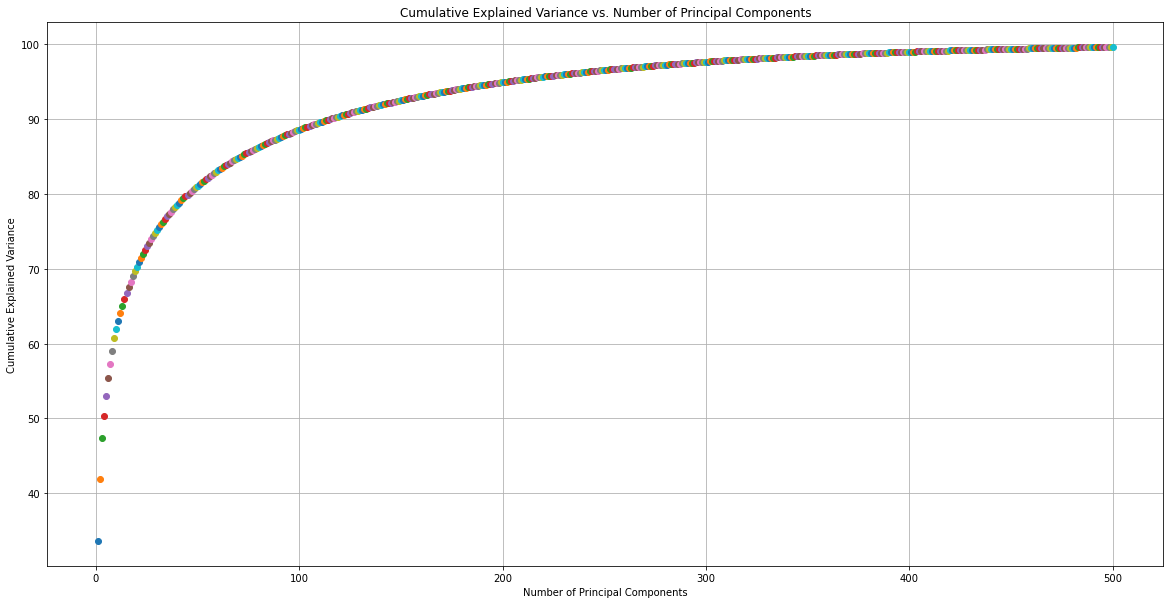

In [68]:
pca.fit(data_new_shape)

##### Transform the data by doing dimensionality reduction

In [71]:
dimension_reduction = pca.transform(data_new_shape)
dimension_reduction.shape

(672, 500)

### 3. Perform the dimensionality reduction on features that you have used for assignment 1 (pictionary dataset) and show the metrics you have shown for the assignment 1. Compare the results and write down the observations in the MARKDOWN.
### 4. Observe the impact of dimensionality reduction on the dataset. Use a classifier on the dataset pre and post-dimensionality reduction (if the number of features of the dataset is n, perform dimensionality reduction varying the principal components from 1 to n) and note the accuracies of the classifier. You are free to use external libraries for the classifier.

In [142]:
dataset = np.load("SMAI-Dataset-release/data.npy",allow_pickle=True) 
dataFrame = pd.DataFrame(dataset)
data = dataFrame.set_axis(['Game-ID', 'Embeddings Generated by ResNet', 'Embeddings Generated by VIT', 'Label', 'GuessTime'], axis='columns')
data_labels = data['Label']

In [143]:
data = np.array(data)
type(data)
dataFrame
data_resnet = []
data_vit = []
for index, value in enumerate(dataset):
    data_index = dataset[index]
    data_resnet.append(data_index[1])
    data_vit.append(data_index[2])
data_resnet = np.array(data_resnet)
data_vit = np.array(data_vit)
print(f'Shape of ResNet Data: {data_resnet.shape}\n Shape of VIT Data: {data_vit.shape}')

Shape of ResNet Data: (1500, 1, 1024)
 Shape of VIT Data: (1500, 1, 512)


In [328]:
resnet_data_new_shape = data_resnet.reshape(1500, -1)
vit_data_new_shape = data_vit.reshape(1500, -1)

pca_assign_1 = PCA(components_num=250)

Shape of X after data centering:  (1500, 1024)
Features Shape: (1024, 1500)
Covariance Matrix Shape: (1024, 1024)


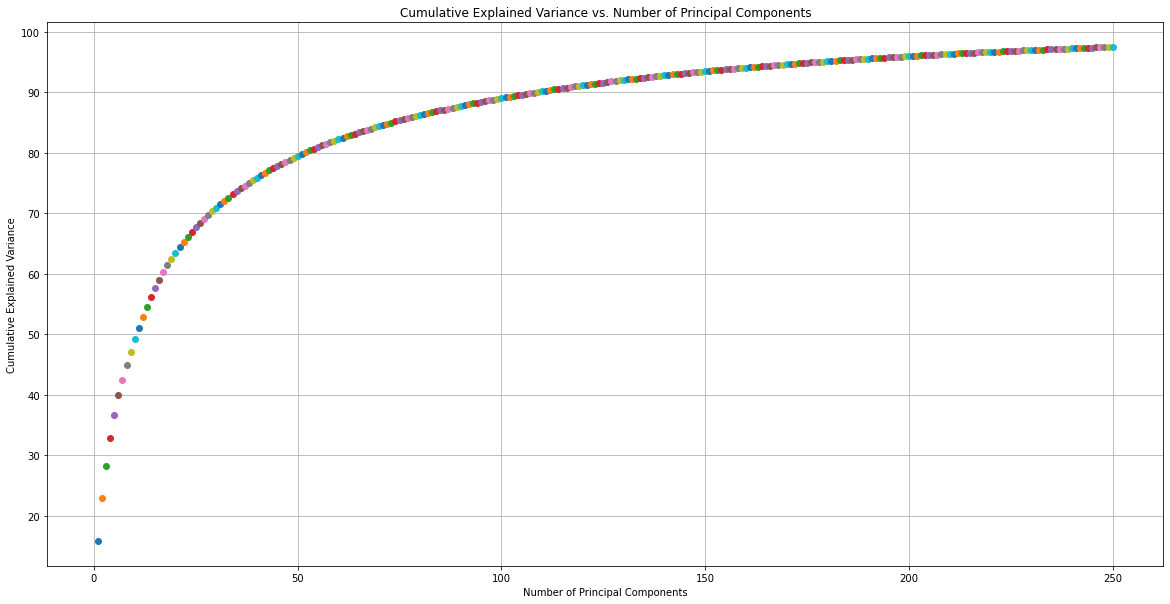

In [329]:
fit_resnet_data = pca_assign_1.fit(resnet_data_new_shape)

In [330]:
resnet_dimension_reduction = pca_assign_1.transform(resnet_data_new_shape)
resnet_dimension_reduction.shape

(1500, 250)

Shape of X after data centering:  (1500, 512)
Features Shape: (512, 1500)
Covariance Matrix Shape: (512, 512)


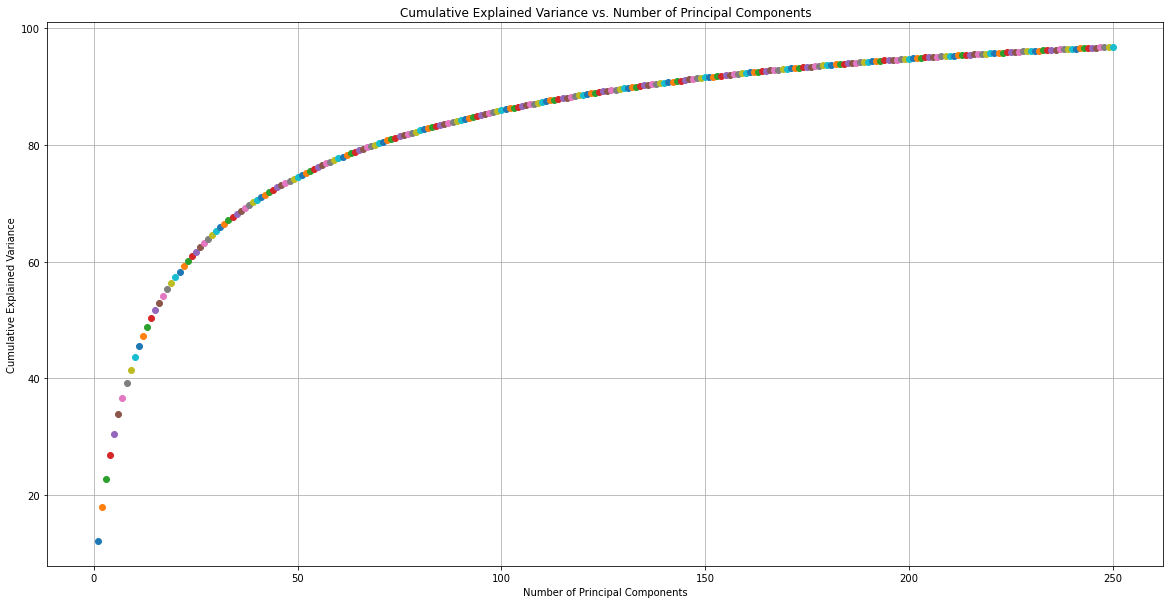

In [331]:
fit_vit_data = pca_assign_1.fit(vit_data_new_shape)

In [332]:
vit_dimension_reduction = pca_assign_1.transform(vit_data_new_shape)
vit_dimension_reduction.shape

(1500, 250)

**knn**

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from collections import Counter



**Initialise the inputs for knn**

In [334]:
## Ask the User to give the inputs

print("Choose the encoder_type:\n 1: resnet\n 2: vit\n")
encoder_input = input("Enter the type number of your choice:\n ")

if encoder_input == "1":
    encoder_type = "resnet" 
    train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(resnet_dimension_reduction, data_labels, test_size=0.2, random_state=42) 
elif encoder_input == "2":
    encoder_type = "vit"
    train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(vit_dimension_reduction, data_labels, test_size=0.2, random_state=42) 
else:
    print("Your choice is not valid.")
    exit()

k = int(input("Enter the choice of you k value to get the number of nearest neighbours\n"))

print("Choose the type of distance metric:\n 1: euclidean\n 2: manhattan\n")
distance_metric_input = input("Enter the choice of your distance metric:\n")

if distance_metric_input == "1":
    distance_metric = "euclidean"
elif distance_metric_input == "2":
    distance_metric = "manhattan"
else:
    print("Your choice is invalid")
    exit()

Choose the encoder_type:
 1: resnet
 2: vit

Choose the type of distance metric:
 1: euclidean
 2: manhattan



**knn classifier**

In [335]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [336]:
knn_classifier.fit(train_data_features, train_data_labels)
predicted = knn_classifier.predict(test_data_features)


In [337]:
f1_val = f1_score(test_data_labels, predicted, average='weighted')
accuracy_val = accuracy_score(test_data_labels, predicted)
precision_val = precision_score(test_data_labels, predicted, average='weighted', zero_division=1)
recall_val = recall_score(test_data_labels, predicted, average='weighted', zero_division=1)

metrics_with_dr = {
    'f1_score': f1_val,
    'Accuracy': accuracy_val,
    'Precision': precision_val,
    'Recall': recall_val
}
print('The metrics after dimensionalitty reduction')
print(metrics_with_dr)

The metrics after dimensionalitty reduction
{'f1_score': 0.13778447827828633, 'Accuracy': 0.16, 'Precision': 0.5754309301809302, 'Recall': 0.16}


In [339]:
## Ask the User to give the inputs

print("Choose the encoder_type:\n 1: resnet\n 2: vit\n")
encoder_input = input("Enter the type number of your choice:\n ")

if encoder_input == "1":
    encoder_type = "resnet" 
    train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(resnet_data_new_shape, test_size=0.2, random_state=42) 
elif encoder_input == "2":
    encoder_type = "vit"
    train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(vit_data_new_shape, data_labels, test_size=0.2, random_state=42) 
else:
    print("Your choice is not valid.")
    exit()

k = int(input("Enter the choice of you k value to get the number of nearest neighbours\n"))

print("Choose the type of distance metric:\n 1: euclidean\n 2: manhattan\n")
distance_metric_input = input("Enter the choice of your distance metric:\n")

if distance_metric_input == "1":
    distance_metric = "euclidean"
elif distance_metric_input == "2":
    distance_metric = "manhattan"
else:
    print("Your choice is invalid")
    exit()

Choose the encoder_type:
 1: resnet
 2: vit

Choose the type of distance metric:
 1: euclidean
 2: manhattan



In [340]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [341]:
knn_classifier.fit(train_data_features, train_data_labels)
predicted = knn_classifier.predict(test_data_features)


In [342]:
f1_val = f1_score(test_data_labels, predicted, average='weighted')
accuracy_val = accuracy_score(test_data_labels, predicted)
precision_val = precision_score(test_data_labels, predicted, average='weighted', zero_division=1)
recall_val = recall_score(test_data_labels, predicted, average='weighted', zero_division=1)

metrics_without_dr = {
    'f1_score': f1_val,
    'Accuracy': accuracy_val,
    'Precision': precision_val,
    'Recall': recall_val
}
print('The metrics after dimensionalitty reduction')
print(metrics_without_dr)

The metrics after dimensionalitty reduction
{'f1_score': 0.19057050683521273, 'Accuracy': 0.21333333333333335, 'Precision': 0.5157712842712842, 'Recall': 0.21333333333333335}


### 1.2. Pictionary Dataset
### This task is to perform the PCA on the Pictionary Dataset (Dataset).The attachment also contains the description for the Dataset. Perform PCA for both drawer and guesser.
### • Plot the above features with respect to the obtained PCA axes.
### • What does each of the new axes that are obtained from PCA represent ?

In [343]:
drawer_dataset = pd.read_csv('SMAI-Dataset-release/drawer_attributes.csv')
guesser_dataset = pd.read_csv('SMAI-Dataset-release/guesser_attributes.csv')
print(drawer_dataset.shape, guesser_dataset.shape)

(100, 9) (100, 7)


Shape of X after data centering:  (100, 9)
Features Shape: (9, 100)
Covariance Matrix Shape: (9, 9)


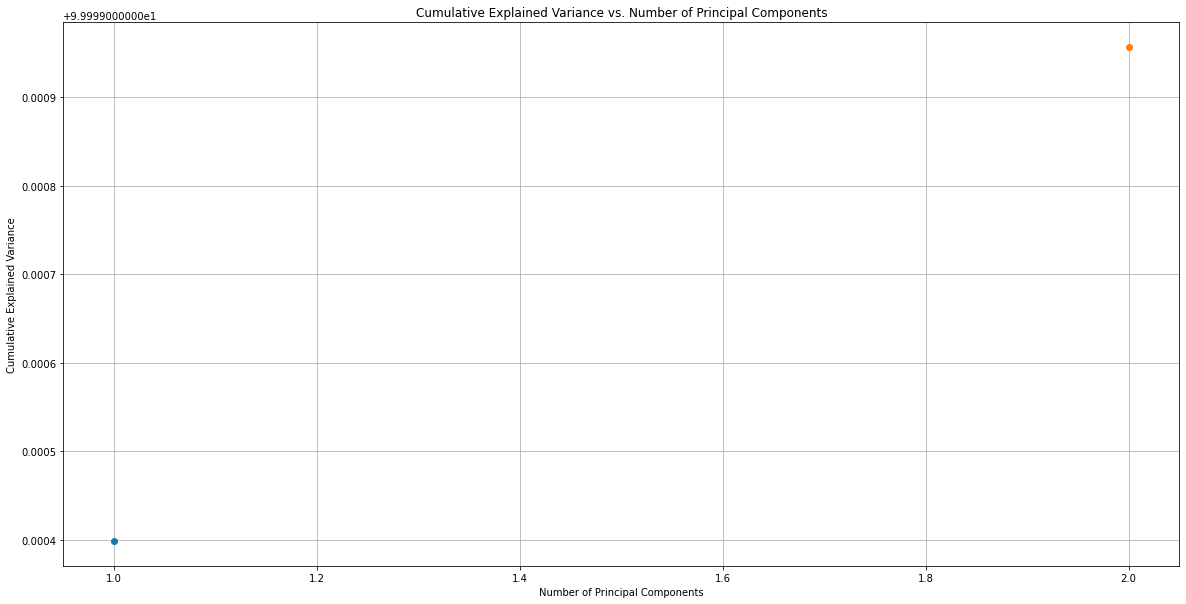

Shape of X after data centering:  (100, 7)
Features Shape: (7, 100)
Covariance Matrix Shape: (7, 7)


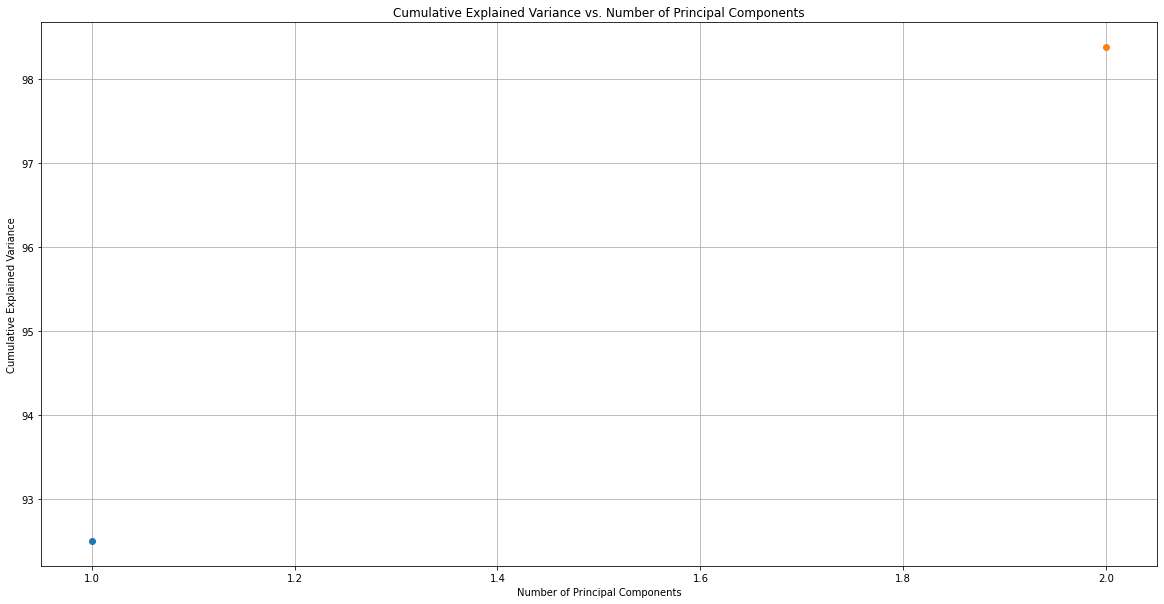

In [344]:
pca_pict = PCA(2)
drawer_dataset_pca = pca_pict.fit(drawer_dataset)
drawer_dimension_reduction = pca_pict.transform(drawer_dataset)

guesser_dataset_pca = pca_pict.fit(guesser_dataset)
guesser_dimension_reduction = pca_pict.transform(guesser_dataset)

In [345]:
guesser = pd.DataFrame(guesser_dimension_reduction)
drawer = pd.DataFrame(drawer_dimension_reduction)

**2D Visualization with 2 PCs**

<Figure size 1440x720 with 0 Axes>

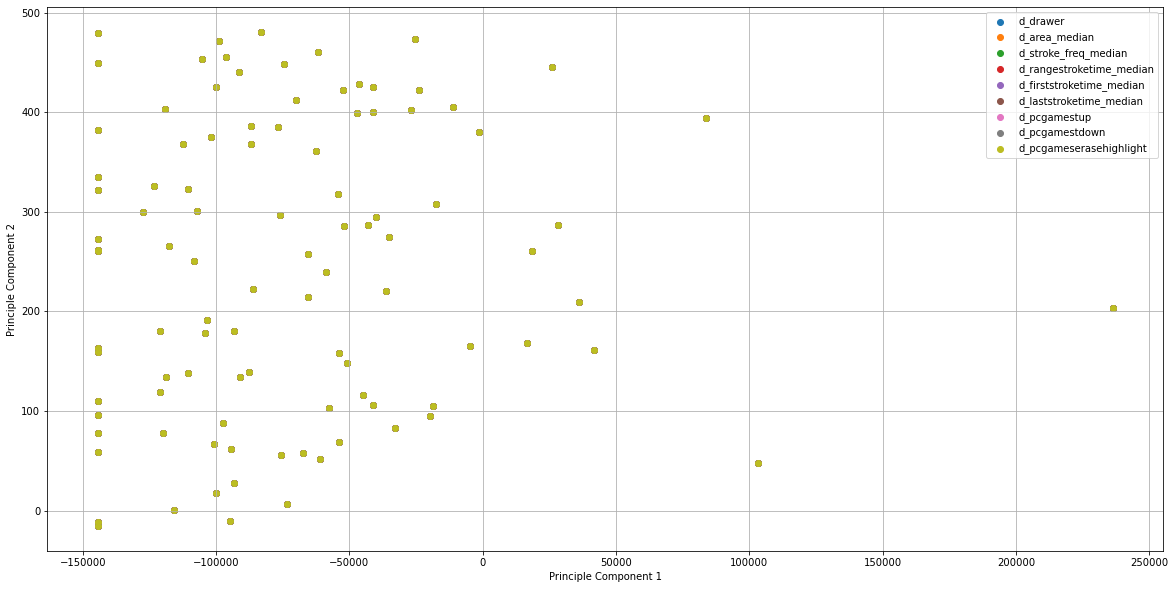

In [346]:
labels = drawer_dataset.columns
fig = plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
for label in labels:
    x = drawer[0].values
    y = drawer[1].values
    #ax.scatter3D(x, y, z, label=label, marker='o', s=50)
    plt.scatter(x, y, label=label, marker='o')

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.grid(True)
plt.legend()
plt.show()
#drawer_dataset.columns

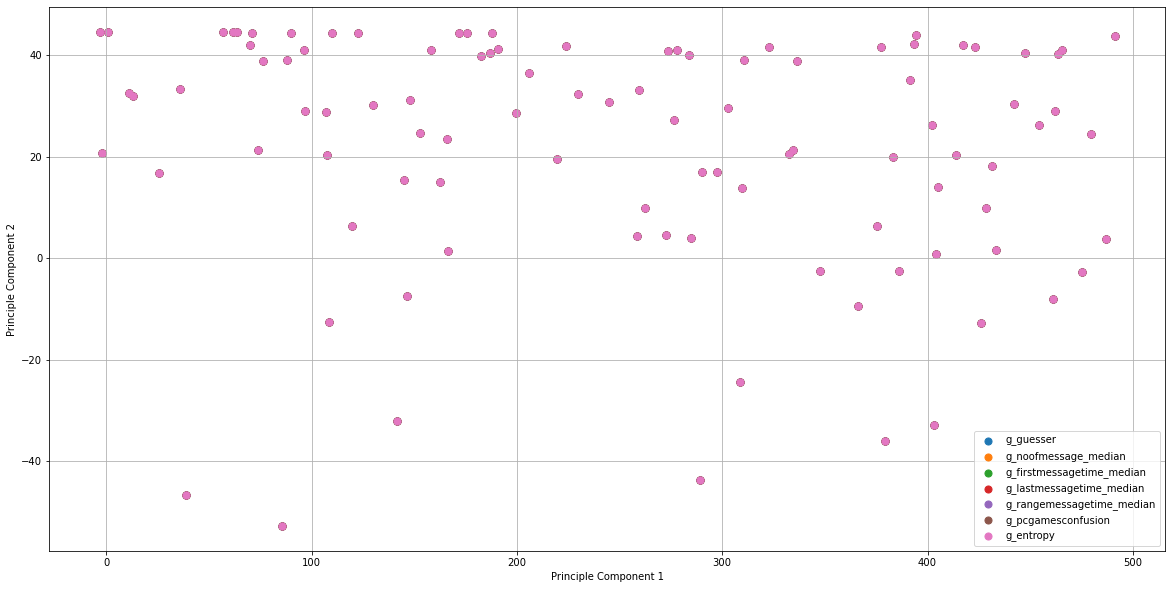

In [347]:
labels = guesser_dataset.columns
plt.figure(figsize=(20,10))
for label in labels:
    x = guesser[0].values
    y = guesser[1].values
    plt.scatter(x, y, label=label, marker='o', s=50)

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.grid(True)
plt.legend()
plt.show()
